In [310]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


In [311]:
df=pd.read_csv('breast_cancer.csv')
df=df.replace({"diagnosis": {"M": 1, "B": 0}})
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [312]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [313]:
df.shape

(569, 32)

In [314]:
df.iloc[1]

id                         842517.000000
diagnosis                       1.000000
radius_mean                    20.570000
texture_mean                   17.770000
perimeter_mean                132.900000
area_mean                    1326.000000
smoothness_mean                 0.084740
compactness_mean                0.078640
concavity_mean                  0.086900
concave points_mean             0.070170
symmetry_mean                   0.181200
fractal_dimension_mean          0.056670
radius_se                       0.543500
texture_se                      0.733900
perimeter_se                    3.398000
area_se                        74.080000
smoothness_se                   0.005225
compactness_se                  0.013080
concavity_se                    0.018600
concave points_se               0.013400
symmetry_se                     0.013890
fractal_dimension_se            0.003532
radius_worst                   24.990000
texture_worst                  23.410000
perimeter_worst 

# PreProcessing

In [315]:
target=df['diagnosis']
features=df.drop(['id','diagnosis'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2)

In [316]:
print(f"Features => train: {x_train.shape} - test: {x_test.shape}")
print(f"Target => train: {y_train.shape} - test: {y_test.shape}")

Features => train: (455, 30) - test: (114, 30)
Target => train: (455,) - test: (114,)


In [317]:
x_train.iloc[0]

radius_mean                  17.680000
texture_mean                 20.740000
perimeter_mean              117.400000
area_mean                   963.700000
smoothness_mean               0.111500
compactness_mean              0.166500
concavity_mean                0.185500
concave points_mean           0.105400
symmetry_mean                 0.197100
fractal_dimension_mean        0.061660
radius_se                     0.811300
texture_se                    1.400000
perimeter_se                  5.540000
area_se                      93.910000
smoothness_se                 0.009037
compactness_se                0.049540
concavity_se                  0.052060
concave points_se             0.018410
symmetry_se                   0.017780
fractal_dimension_se          0.004968
radius_worst                 20.470000
texture_worst                25.110000
perimeter_worst             132.900000
area_worst                 1302.000000
smoothness_worst              0.141800
compactness_worst        

In [318]:
scaler = MinMaxScaler(feature_range=(0,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [319]:
x_train[0]

array([0.52346005, 0.35847751, 0.51435958, 0.34791092, 0.53146159,
       0.50380111, 0.4346298 , 0.52385686, 0.46010101, 0.24641955,
       0.2873332 , 0.22980021, 0.26731124, 0.16269766, 0.24897168,
       0.35515366, 0.13146465, 0.34874029, 0.18474001, 0.14072109,
       0.44610459, 0.34062078, 0.41082723, 0.27447896, 0.46642013,
       0.31290082, 0.30623932, 0.52061856, 0.17701557, 0.14653024])

# Classification

In [320]:
def calculate_metrics(y_train,y_test,y_pred_train,y_pred_test):
    acc_train=accuracy_score(y_true=y_train,y_pred=y_pred_train)
    acc_test=accuracy_score(y_true=y_test,y_pred=y_pred_test)
    p=precision_score(y_true=y_test,y_pred=y_pred_test)
    r=recall_score(y_true=y_test,y_pred=y_pred_test)
    
    print(f"acc_train: {acc_train} - acc_test: {acc_test} - precision: {p} - recall: {r}")
    
    return acc_train,acc_test,p,r

### 1.Naive bayes

In [321]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [322]:
y_pred_train=gnb.predict(x_train)
y_pred_test=gnb.predict(x_test)

acc_train_gnb,acc_test_gnb,p_gnb,r_gnb=calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc_train: 0.945054945054945 - acc_test: 0.868421052631579 - precision: 0.8536585365853658 - recall: 0.7954545454545454


### 2.KNN

In [323]:
knn=KNeighborsClassifier(n_neighbors=8,algorithm='kd_tree',leaf_size=28)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [324]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)
### 2.KNN

acc_train: 0.9736263736263736 - acc_test: 0.9473684210526315 - precision: 1.0 - recall: 0.8636363636363636


### 3.Decision Tree

In [325]:
dt=DecisionTreeClassifier(max_depth=64,min_samples_split=4,criterion='entropy')
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=64, min_samples_split=4)

In [326]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)


acc_train: 1.0 - acc_test: 0.9298245614035088 - precision: 0.95 - recall: 0.8636363636363636


### 4.Random Forest

In [327]:
rf=RandomForestClassifier(n_estimators=1000,max_depth=32,min_samples_split=4)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=32, min_samples_split=4, n_estimators=1000)

In [328]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 1.0 - acc_test: 0.956140350877193 - precision: 0.9534883720930233 - recall: 0.9318181818181818


### 5.Support Vector Machine

In [329]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [330]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)
### 5.Support Vector Machine

acc_train: 0.9868131868131869 - acc_test: 0.9649122807017544 - precision: 0.9761904761904762 - recall: 0.9318181818181818


### 6.Logestic Regression

In [331]:
lr = LogisticRegression()
lr.fit(x_train, y_train)


LogisticRegression()

In [332]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9692307692307692 - acc_test: 0.9385964912280702 - precision: 1.0 - recall: 0.8409090909090909


### 7.ANN

In [333]:
ann= MLPClassifier(hidden_layer_sizes=512,activation='tanh',solver='adam',max_iter=300,batch_size=32)
ann.fit(x_train,y_train)

MLPClassifier(activation='tanh', batch_size=32, hidden_layer_sizes=512,
              max_iter=300)

In [334]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)


acc_train: 0.9956043956043956 - acc_test: 0.9473684210526315 - precision: 0.9523809523809523 - recall: 0.9090909090909091


### Comparison

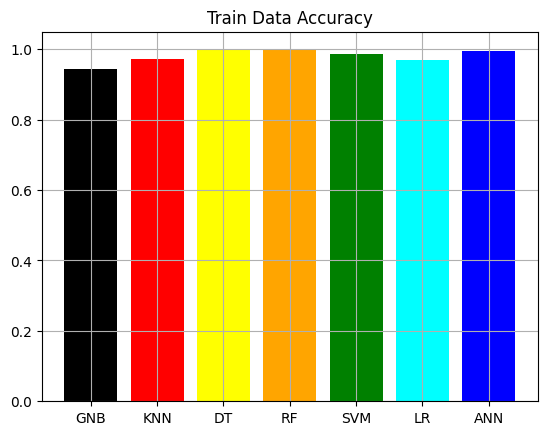

In [335]:
acc_train = [acc_train_gnb,acc_train_knn,acc_train_dt,acc_train_rf,acc_train_svm,acc_train_lr,acc_train_ann]
title=["GNB","KNN","DT","RF","SVM","LR","ANN"]
colors = ['black','red','yellow','orange','green','cyan','blue']
plt.bar(title,acc_train,color=colors)
plt.title('Train Data Accuracy')
plt.grid()
plt.show()

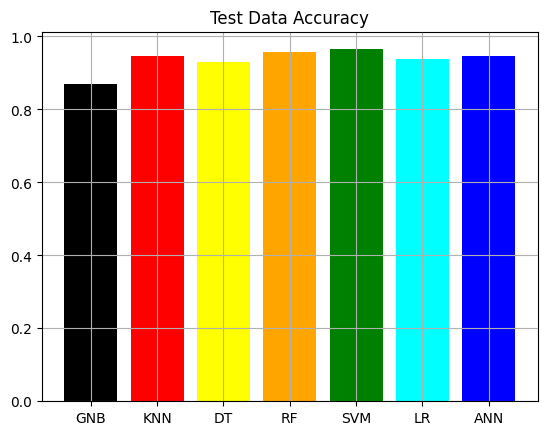

In [336]:
acc_test = [acc_test_gnb,acc_test_knn,acc_test_dt,acc_test_rf,acc_test_svm,acc_test_lr,acc_test_ann]
title=["GNB","KNN","DT","RF","SVM","LR","ANN"]
colors = ['black','red','yellow','orange','green','cyan','blue']
plt.bar(title,acc_test,color=colors)
plt.title('Test Data Accuracy')
plt.grid()
plt.show()

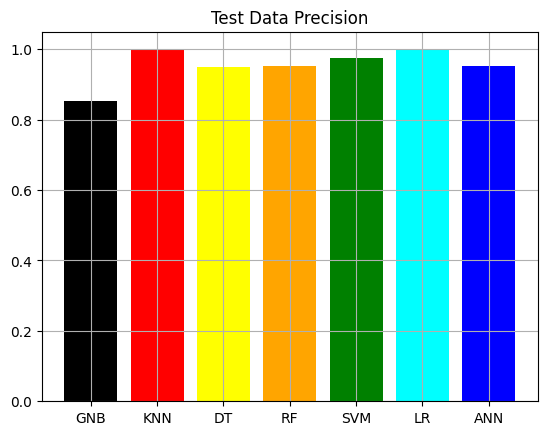

In [337]:
p = [p_gnb,p_knn,p_dt,p_rf,p_svm,p_lr,p_ann]
title=["GNB","KNN","DT","RF","SVM","LR","ANN"]
colors = ['black','red','yellow','orange','green','cyan','blue']
plt.bar(title,p,color=colors)
plt.title('Test Data Precision')
plt.grid()
plt.show()

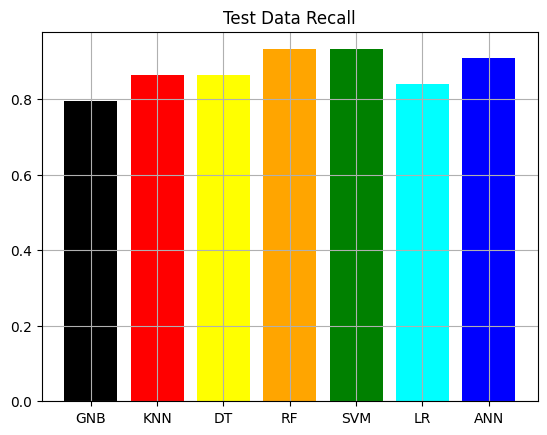

In [338]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ['black', 'red', 'yellow', 'orange', 'green', 'cyan', 'blue']
plt.bar(title, r, color=colors)
plt.title('Test Data Recall')
plt.grid()
plt.show()


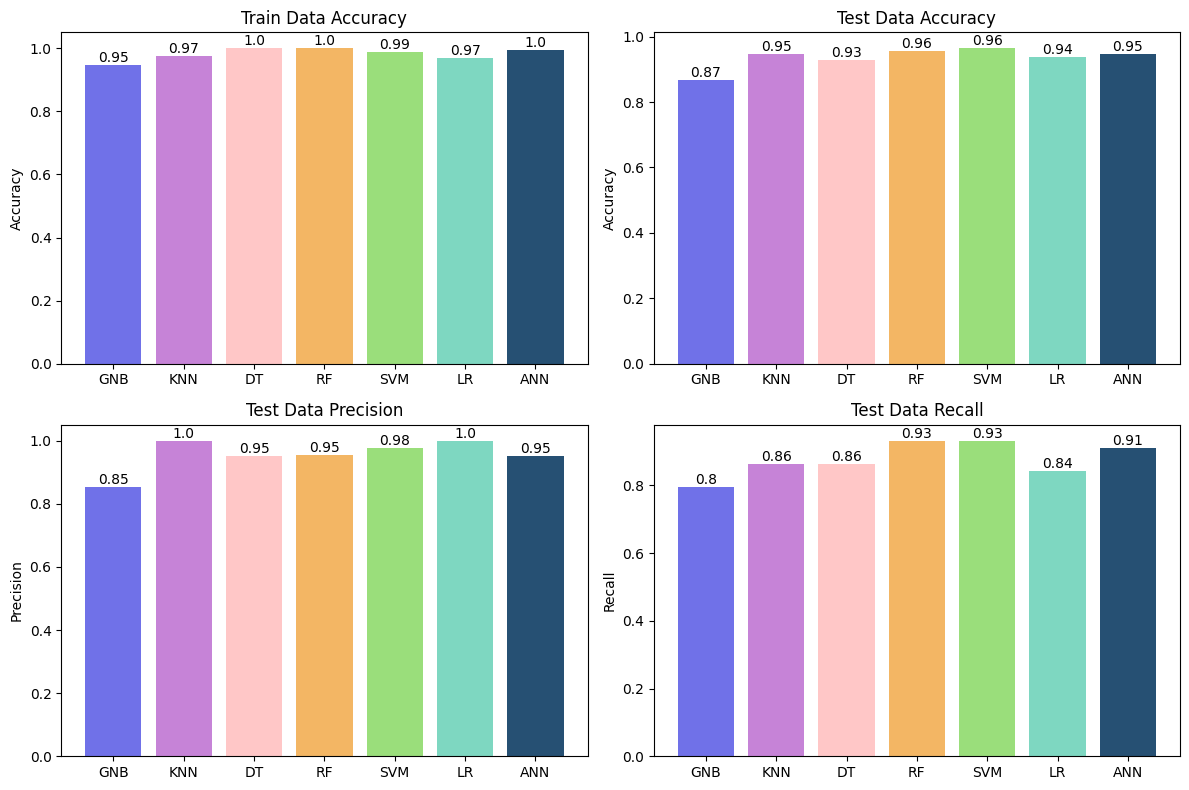

In [339]:
acc_train = [acc_train_gnb,acc_train_knn,acc_train_dt,acc_train_rf,acc_train_svm,acc_train_lr,acc_train_ann]
acc_test = [acc_test_gnb,acc_test_knn,acc_test_dt,acc_test_rf,acc_test_svm,acc_test_lr,acc_test_ann]
p = [p_gnb,p_knn,p_dt,p_rf,p_svm,p_lr,p_ann]
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]

titles = ['Train Data Accuracy', 'Test Data Accuracy', 'Test Data Precision', 'Test Data Recall']
y_labels = ['Accuracy', 'Accuracy', 'Precision', 'Recall']
colors = ['#7071E8', '#C683D7', '#FFC7C7', '#F3B664', '#9ADE7B', '#7ED7C1', '#265073']
data_sets = [acc_train, acc_test, p, r]

rows = 2
cols = 2
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))

for i in range(rows):
    for j in range(cols):
        idx = i * cols + j
        bars = axs[i, j].bar(title, data_sets[idx], color=colors)
        axs[i, j].set_title(titles[idx])
        axs[i, j].set_ylabel(y_labels[idx])

        for bar in bars:
            yval = bar.get_height()
            axs[i, j].text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('output_plot.png')
plt.show()
